In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime


In [2]:
yf.pdr_override()
y_symbols = ['AAPL']
startdate = datetime(2010,1,1)
enddate = datetime(2024,3,7)
df = pdr.get_data_yahoo(y_symbols, start = startdate, end = enddate)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-29,181.270004,182.570007,179.529999,180.750000,180.750000,136682600
2024-03-01,179.550003,180.529999,177.380005,179.660004,179.660004,73488000
2024-03-04,176.149994,176.899994,173.789993,175.100006,175.100006,81510100
2024-03-05,170.759995,172.039993,169.619995,170.119995,170.119995,95132400
2024-03-06,171.059998,171.240005,168.679993,169.119995,169.119995,68587700


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470740,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


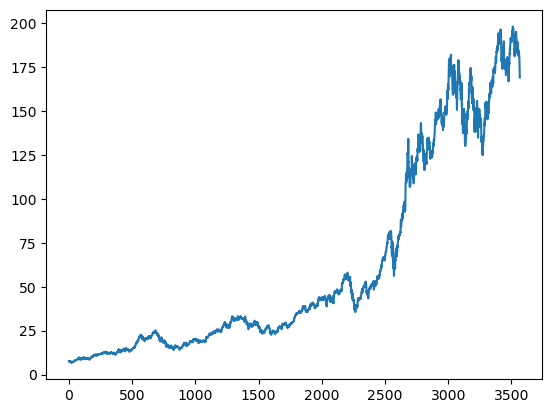

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3562,181.270004,182.570007,179.529999,180.750000,136682600
3563,179.550003,180.529999,177.380005,179.660004,73488000
3564,176.149994,176.899994,173.789993,175.100006,81510100
3565,170.759995,172.039993,169.619995,170.119995,95132400


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3562    185.7535
3563    185.7752
3564    185.7363
3565    185.6536
3566    185.5468
Name: Close, Length: 3567, dtype: float64

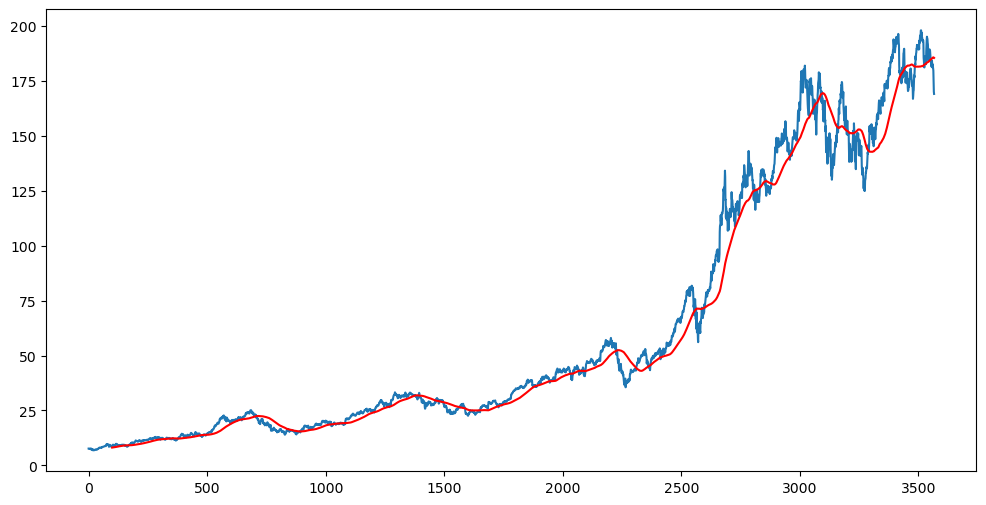

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3562    183.90420
3563    183.94215
3564    183.95730
3565    183.94445
3566    183.91480
Name: Close, Length: 3567, dtype: float64

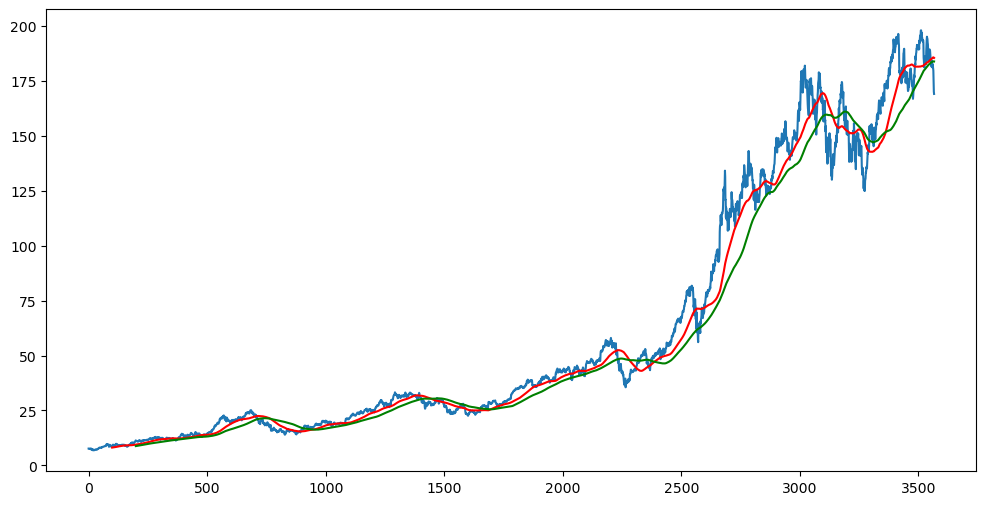

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(3567, 5)

In [13]:
# Splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2496, 1)
(1071, 1)


In [14]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [15]:
data_testing.head()

,Close
2496,64.862503
2497,65.434998
2498,66.394997
2499,67.677498
2500,66.730003


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01304944],
       [0.01326931],
       [0.01124296],
       ...,
       [1.        ],
       [0.99754582],
       [0.98469248]])

In [18]:
data_training_array.shape

(2496, 1)

In [19]:
x_train = []
y_train =[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i].reshape(-1, 1))
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(2396, 100, 1)

# ML model

In [21]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences= True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
75/75 [==============================] - 11s 110ms/step - loss: 0.0193
Epoch 2/50
75/75 [==============================] - 8s 109ms/step - loss: 0.0050
Epoch 3/50
75/75 [==============================] - 8s 109ms/step - loss: 0.0049
Epoch 4/50
75/75 [==============================] - 8s 110ms/step - loss: 0.0048
Epoch 5/50
75/75 [==============================] - 8s 112ms/step - loss: 0.0042
Epoch 6/50
75/75 [==============================] - 8s 110ms/step - loss: 0.0040
Epoch 7/50
75/75 [==============================] - 8s 109ms/step - loss: 0.0038
Epoch 8/50
75/75 [==============================] - 8s 109ms/step - loss: 0.0033
Epoch 9/50
75/75 [==============================] - 8s 111ms/step - loss: 0.0032
Epoch 10/50
75/75 [==============================] - 8s 110ms/step - loss: 0.0030
Epoch 11/50
75/75 [==============================] - 8s 110ms/step - loss: 0.0029
Epoch 12/50
75/75 [==============================] - 8s 109ms/step - loss: 0.0025
Epoch 13/50
75/75 [=====

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

,Close
2496,64.862503
2497,65.434998
2498,66.394997
2499,67.677498
2500,66.730003


In [27]:
past_100_days = data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [29]:
final_df.head()

,Close
0,50.825001
1,51.302502
2,51.125000
3,50.837502
4,51.415001


In [30]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01662495],
       [0.01981307],
       [0.01862795],
       ...,
       [0.84636959],
       [0.81311964],
       [0.80644296]])

In [31]:
input_data.shape

(1171, 1)

In [32]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i].reshape(-1, 1))
    y_test.append(input_data[i, 0])

In [33]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1071, 100, 1)
(1071,)


In [34]:
# Making Predictions

y_predicted = model.predict(x_test)

34/34 [==============================] - 2s 42ms/step


In [35]:
y_predicted.shape

(1071, 1)

In [36]:
y_test

array([0.11034888, 0.11417125, 0.12058085, ..., 0.84636959, 0.81311964,
       0.80644296])

In [37]:
y_predicted

array([[0.18142194],
       [0.18239792],
       [0.18320164],
       ...,
       [0.8743566 ],
       [0.8719009 ],
       [0.8667561 ]], dtype=float32)

In [38]:
scaler.scale_

array([0.00667668])

In [39]:
scale_factor = 1/0.00667668
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

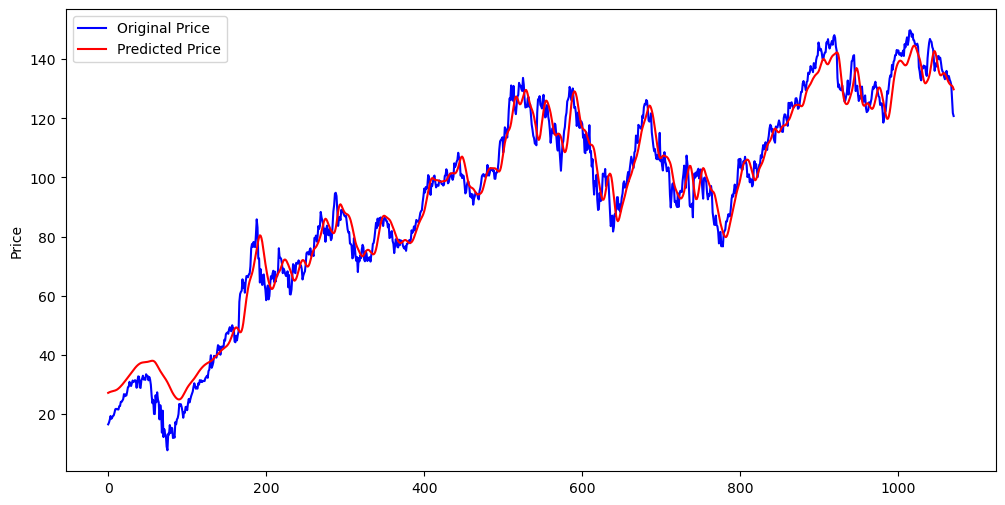

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel=('Time')
plt.ylabel('Price')
plt.legend()
plt.show()